In [ ]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Read the csv file
df = pd.read_csv('ola.csv')
df.head()

,datetime,season,weather,temp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,3,2,6.66,76.62,9.57,5,128,133
1,2011-01-01 01:00:00,4,3,13.54,55.91,4.01,36,184,220
2,2011-01-01 02:00:00,1,3,29.58,20.97,33.61,34,97,131
3,2011-01-01 03:00:00,3,1,7.40,61.64,15.85,6,47,53
4,2011-01-01 04:00:00,3,4,30.66,98.71,11.47,14,199,213


In [ ]:
df.shape

(10886, 9)

In [ ]:
df.dtypes

,0
datetime,object
season,int64
weather,int64
temp,float64
humidity,float64
windspeed,float64
casual,int64
registered,int64
count,int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   weather     10886 non-null  int64  
 3   temp        10886 non-null  float64
 4   humidity    10886 non-null  float64
 5   windspeed   10886 non-null  float64
 6   casual      10886 non-null  int64  
 7   registered  10886 non-null  int64  
 8   count       10886 non-null  int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 765.6+ KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
season,10886.0,2.493937,1.120531,1.0,1.0000,2.00,3.0000,4.00
weather,10886.0,2.491916,1.123139,1.0,1.0000,2.00,4.0000,4.00
temp,10886.0,20.137973,8.696625,5.0,12.6300,20.19,27.7075,35.00
humidity,10886.0,59.946072,22.987200,20.0,40.0400,59.97,79.6200,99.98
windspeed,10886.0,24.960981,14.424684,0.0,12.5225,25.00,37.4275,49.99
casual,10886.0,24.517545,14.390014,0.0,12.0000,25.00,37.0000,49.00
registered,10886.0,99.551442,57.541131,0.0,50.0000,100.00,149.0000,199.00
count,10886.0,124.068988,59.449265,0.0,74.0000,124.00,174.0000,248.00


**Feature Engineering**

In [ ]:
parts = df["datetime"].str.split(" ", n=2, expand=True)
df["date"] = parts[0]
df["time"] = parts[1].str[:2].astype('int')
df.head()

,datetime,season,weather,temp,humidity,windspeed,casual,registered,count,date,time
0,2011-01-01 00:00:00,3,2,6.66,76.62,9.57,5,128,133,2011-01-01,0
1,2011-01-01 01:00:00,4,3,13.54,55.91,4.01,36,184,220,2011-01-01,1
2,2011-01-01 02:00:00,1,3,29.58,20.97,33.61,34,97,131,2011-01-01,2
3,2011-01-01 03:00:00,3,1,7.40,61.64,15.85,6,47,53,2011-01-01,3
4,2011-01-01 04:00:00,3,4,30.66,98.71,11.47,14,199,213,2011-01-01,4


In [ ]:
parts = df["date"].str.split("-", n=3, expand=True)
df["year"] = parts[0].astype(int)
df["month"] = parts[1].astype(int)
df["day"] = parts[2].astype(int)
df.head()

,datetime,season,weather,temp,humidity,windspeed,casual,registered,count,date,time,year,month,day
0,2011-01-01 00:00:00,3,2,6.66,76.62,9.57,5,128,133,2011-01-01,0,2011,1,1
1,2011-01-01 01:00:00,4,3,13.54,55.91,4.01,36,184,220,2011-01-01,1,2011,1,1
2,2011-01-01 02:00:00,1,3,29.58,20.97,33.61,34,97,131,2011-01-01,2,2011,1,1
3,2011-01-01 03:00:00,3,1,7.40,61.64,15.85,6,47,53,2011-01-01,3,2011,1,1
4,2011-01-01 04:00:00,3,4,30.66,98.71,11.47,14,199,213,2011-01-01,4,2011,1,1


In [ ]:
df.isnull().sum()

,0
datetime,0
season,0
weather,0
temp,0
humidity,0
windspeed,0
casual,0
registered,0
count,0
date,0


In [ ]:
def numeric_df_describe(df):
  d=df.describe().T
  d['unique'] = df.nunique()
  d["no. of nulls"] = df.shape[0]-d["count"]
  d["% of nulls"] = (d["no. of nulls"] / df.shape[0] * 100)
  return d.round(2)

numeric_df_describe(df)

,count,mean,std,min,25%,50%,75%,max,unique,no. of nulls,% of nulls
season,10886.0,2.49,1.12,1.0,1.00,2.00,3.00,4.00,4,0.0,0.0
weather,10886.0,2.49,1.12,1.0,1.00,2.00,4.00,4.00,4,0.0,0.0
temp,10886.0,20.14,8.70,5.0,12.63,20.19,27.71,35.00,2923,0.0,0.0
humidity,10886.0,59.95,22.99,20.0,40.04,59.97,79.62,99.98,5935,0.0,0.0
windspeed,10886.0,24.96,14.42,0.0,12.52,25.00,37.43,49.99,4439,0.0,0.0
casual,10886.0,24.52,14.39,0.0,12.00,25.00,37.00,49.00,50,0.0,0.0
registered,10886.0,99.55,57.54,0.0,50.00,100.00,149.00,199.00,200,0.0,0.0
count,10886.0,124.07,59.45,0.0,74.00,124.00,174.00,248.00,249,0.0,0.0
time,10886.0,11.49,6.92,0.0,5.00,11.00,17.00,23.00,24,0.0,0.0
year,10886.0,2011.20,0.40,2011.0,2011.00,2011.00,2011.00,2012.00,2,0.0,0.0


In [ ]:
df.columns

Index(['datetime', 'season', 'weather', 'temp', 'humidity', 'windspeed',
       'casual', 'registered', 'count', 'date', 'time', 'year', 'month',
       'day'],
      dtype='object')

In [ ]:
from datetime import datetime
import numpy as np

df['datetime'] = pd.to_datetime(df['datetime'])

df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day

# Modify the function to return the actual day of the week (0-6)
def get_day_of_week(year, month, day):
    try:
        d = datetime(year, month, day)
        return d.weekday() # Return 0-6 for Mon-Sun
    except ValueError:
        return np.nan

# Apply the modified function to get the actual day of the week
df['weekday'] = df.apply(lambda x: get_day_of_week(x['year'], x['month'], x['day']), axis=1)
df.head()

,datetime,season,weather,temp,humidity,windspeed,casual,registered,count,date,time,year,month,day,weekday
0,2011-01-01 00:00:00,3,2,6.66,76.62,9.57,5,128,133,2011-01-01,0,2011,1,1,5
1,2011-01-01 01:00:00,4,3,13.54,55.91,4.01,36,184,220,2011-01-01,1,2011,1,1,5
2,2011-01-01 02:00:00,1,3,29.58,20.97,33.61,34,97,131,2011-01-01,2,2011,1,1,5
3,2011-01-01 03:00:00,3,1,7.40,61.64,15.85,6,47,53,2011-01-01,3,2011,1,1,5
4,2011-01-01 04:00:00,3,4,30.66,98.71,11.47,14,199,213,2011-01-01,4,2011,1,1,5


In [ ]:
weekday_map = {
    0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'
}

df['weekday_name'] = df['weekday'].map(weekday_map)

display(df.head())
print(df['weekday_name'].unique())
print(df['weekday_name'].value_counts())

,datetime,season,weather,temp,humidity,windspeed,casual,registered,count,date,time,year,month,day,weekday,weekday_name
0,2011-01-01 00:00:00,3,2,6.66,76.62,9.57,5,128,133,2011-01-01,0,2011,1,1,5,Sat
1,2011-01-01 01:00:00,4,3,13.54,55.91,4.01,36,184,220,2011-01-01,1,2011,1,1,5,Sat
2,2011-01-01 02:00:00,1,3,29.58,20.97,33.61,34,97,131,2011-01-01,2,2011,1,1,5,Sat
3,2011-01-01 03:00:00,3,1,7.40,61.64,15.85,6,47,53,2011-01-01,3,2011,1,1,5,Sat
4,2011-01-01 04:00:00,3,4,30.66,98.71,11.47,14,199,213,2011-01-01,4,2011,1,1,5,Sat


['Sat' 'Sun' 'Mon' 'Tue' 'Wed' 'Thu' 'Fri']
weekday_name
Sat    1560
Sun    1560
Mon    1560
Tue    1560
Wed    1560
Thu    1550
Fri    1536
Name: count, dtype: int64


In [ ]:
from datetime import date
import holidays


def is_holiday(x):

    india_holidays = holidays.country_holidays('IN')

    if india_holidays.get(x):
        return 1
    else:
        return 0


df['holidays'] = df['date'].apply(is_holiday)
df.head()
print(df['holidays'].unique())
print(df['holidays'].value_counts())

[0 1]
holidays
0    10430
1      456
Name: count, dtype: int64


In [ ]:
season_map = {1:'spring', 2:'summer', 3:'fall', 4:'winter'}

df['season_name'] = df['season'].map(season_map)

display(df.head())
print(df['season_name'].unique())
print(df['season_name'].value_counts())

,datetime,season,weather,temp,humidity,windspeed,casual,registered,count,date,time,year,month,day,weekday,weekday_name,holidays,season_name
0,2011-01-01 00:00:00,3,2,6.66,76.62,9.57,5,128,133,2011-01-01,0,2011,1,1,5,Sat,0,fall
1,2011-01-01 01:00:00,4,3,13.54,55.91,4.01,36,184,220,2011-01-01,1,2011,1,1,5,Sat,0,winter
2,2011-01-01 02:00:00,1,3,29.58,20.97,33.61,34,97,131,2011-01-01,2,2011,1,1,5,Sat,0,spring
3,2011-01-01 03:00:00,3,1,7.40,61.64,15.85,6,47,53,2011-01-01,3,2011,1,1,5,Sat,0,fall
4,2011-01-01 04:00:00,3,4,30.66,98.71,11.47,14,199,213,2011-01-01,4,2011,1,1,5,Sat,0,fall


['fall' 'winter' 'spring' 'summer']
season_name
spring    2753
summer    2723
winter    2720
fall      2690
Name: count, dtype: int64


In [ ]:
month_map = {1:'jan', 2:'feb', 3:'mar', 4:'apr', 5:'may', 6:'jun', 7:'jul', 8:'aug', 9:'sept', 10:'oct', 11:'nov', 12:'dec'}

df['month_name'] = df['month'].map(month_map)

display(df.head())
print(df['month_name'].unique())
print(df['month_name'].value_counts())

,datetime,season,weather,temp,humidity,windspeed,casual,registered,count,date,time,year,month,day,weekday,weekday_name,holidays,season_name,month_name
0,2011-01-01 00:00:00,3,2,6.66,76.62,9.57,5,128,133,2011-01-01,0,2011,1,1,5,Sat,0,fall,jan
1,2011-01-01 01:00:00,4,3,13.54,55.91,4.01,36,184,220,2011-01-01,1,2011,1,1,5,Sat,0,winter,jan
2,2011-01-01 02:00:00,1,3,29.58,20.97,33.61,34,97,131,2011-01-01,2,2011,1,1,5,Sat,0,spring,jan
3,2011-01-01 03:00:00,3,1,7.40,61.64,15.85,6,47,53,2011-01-01,3,2011,1,1,5,Sat,0,fall,jan
4,2011-01-01 04:00:00,3,4,30.66,98.71,11.47,14,199,213,2011-01-01,4,2011,1,1,5,Sat,0,fall,jan


['jan' 'feb' 'mar' 'apr' 'may' 'jun' 'jul' 'aug' 'sept' 'oct' 'nov' 'dec']
month_name
jan     1488
mar     1430
feb     1368
may      744
dec      744
jul      744
aug      744
oct      744
apr      720
jun      720
sept     720
nov      720
Name: count, dtype: int64


In [ ]:
weather_map = {1:'clear', 2:'partly_clear', 3:'rain', 4:'intense'}

df['weather_name'] = df['weather'].map(weather_map)

display(df.head())
print(df['weather_name'].unique())
print(df['weather_name'].value_counts())

,datetime,season,weather,temp,humidity,windspeed,casual,registered,count,date,time,year,month,day,weekday,weekday_name,holidays,season_name,month_name,weather_name
0,2011-01-01 00:00:00,3,2,6.66,76.62,9.57,5,128,133,2011-01-01,0,2011,1,1,5,Sat,0,fall,jan,partly_clear
1,2011-01-01 01:00:00,4,3,13.54,55.91,4.01,36,184,220,2011-01-01,1,2011,1,1,5,Sat,0,winter,jan,rain
2,2011-01-01 02:00:00,1,3,29.58,20.97,33.61,34,97,131,2011-01-01,2,2011,1,1,5,Sat,0,spring,jan,rain
3,2011-01-01 03:00:00,3,1,7.40,61.64,15.85,6,47,53,2011-01-01,3,2011,1,1,5,Sat,0,fall,jan,clear
4,2011-01-01 04:00:00,3,4,30.66,98.71,11.47,14,199,213,2011-01-01,4,2011,1,1,5,Sat,0,fall,jan,intense


['partly_clear' 'rain' 'clear' 'intense']
weather_name
clear           2772
intense         2733
partly_clear    2720
rain            2661
Name: count, dtype: int64


In [ ]:
df.columns
df.shape

(10886, 20)

In [ ]:
# Drop the columns which has no impact on dataset
df.drop(['weather','weekday','season','month','day','datetime', 'date'],axis=1,inplace=True)


In [ ]:
df.columns
df.shape

(10886, 13)

In [ ]:
#Updating the categorical columns to their appropriate data type
cat_con = ['season_name','year','month_name','holidays','weekday_name','weather_name']
for i in cat_con:
  df[i]=df[i].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   temp          10886 non-null  float64 
 1   humidity      10886 non-null  float64 
 2   windspeed     10886 non-null  float64 
 3   casual        10886 non-null  int64   
 4   registered    10886 non-null  int64   
 5   count         10886 non-null  int64   
 6   time          10886 non-null  int64   
 7   year          10886 non-null  category
 8   weekday_name  10886 non-null  category
 9   holidays      10886 non-null  category
 10  season_name   10886 non-null  category
 11  month_name    10886 non-null  category
 12  weather_name  10886 non-null  category
dtypes: category(6), float64(3), int64(4)
memory usage: 660.6 KB


In [ ]:
df.sample(5)

,temp,humidity,windspeed,casual,registered,count,time,year,weekday_name,holidays,season_name,month_name,weather_name
2055,25.20,73.54,18.88,26,68,94,15,2011,Sun,0,fall,mar,intense
6163,9.11,84.86,19.17,27,101,128,19,2011,Wed,0,spring,sept,partly_clear
6320,20.44,88.75,45.35,32,143,175,8,2011,Wed,0,fall,sept,partly_clear
7869,11.52,92.71,16.71,5,111,116,21,2011,Thu,0,winter,nov,rain
1924,13.62,82.15,30.22,20,64,84,4,2011,Tue,0,summer,mar,rain


In [ ]:
df.shape

(10886, 13)

In [ ]:
numeric_df_describe(df)

,count,mean,std,min,25%,50%,75%,max,unique,no. of nulls,% of nulls
temp,10886.0,20.14,8.70,5.0,12.63,20.19,27.71,35.00,2923,0.0,0.0
humidity,10886.0,59.95,22.99,20.0,40.04,59.97,79.62,99.98,5935,0.0,0.0
windspeed,10886.0,24.96,14.42,0.0,12.52,25.00,37.43,49.99,4439,0.0,0.0
casual,10886.0,24.52,14.39,0.0,12.00,25.00,37.00,49.00,50,0.0,0.0
registered,10886.0,99.55,57.54,0.0,50.00,100.00,149.00,199.00,200,0.0,0.0
count,10886.0,124.07,59.45,0.0,74.00,124.00,174.00,248.00,249,0.0,0.0
time,10886.0,11.49,6.92,0.0,5.00,11.00,17.00,23.00,24,0.0,0.0


In [ ]:
df.describe(exclude='number').T

,count,unique,top,freq
year,10886,2,2011,8760
weekday_name,10886,7,Mon,1560
holidays,10886,2,0,10430
season_name,10886,4,spring,2753
month_name,10886,12,jan,1488
weather_name,10886,4,clear,2772


In [ ]:
df.columns

Index(['temp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'time', 'year', 'weekday_name', 'holidays', 'season_name', 'month_name',
       'weather_name'],
      dtype='object')

In [ ]:
df.columns

Index(['temp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'time', 'year', 'weekday_name', 'holidays', 'season_name', 'month_name',
       'weather_name'],
      dtype='object')

**Visualizion of Data**

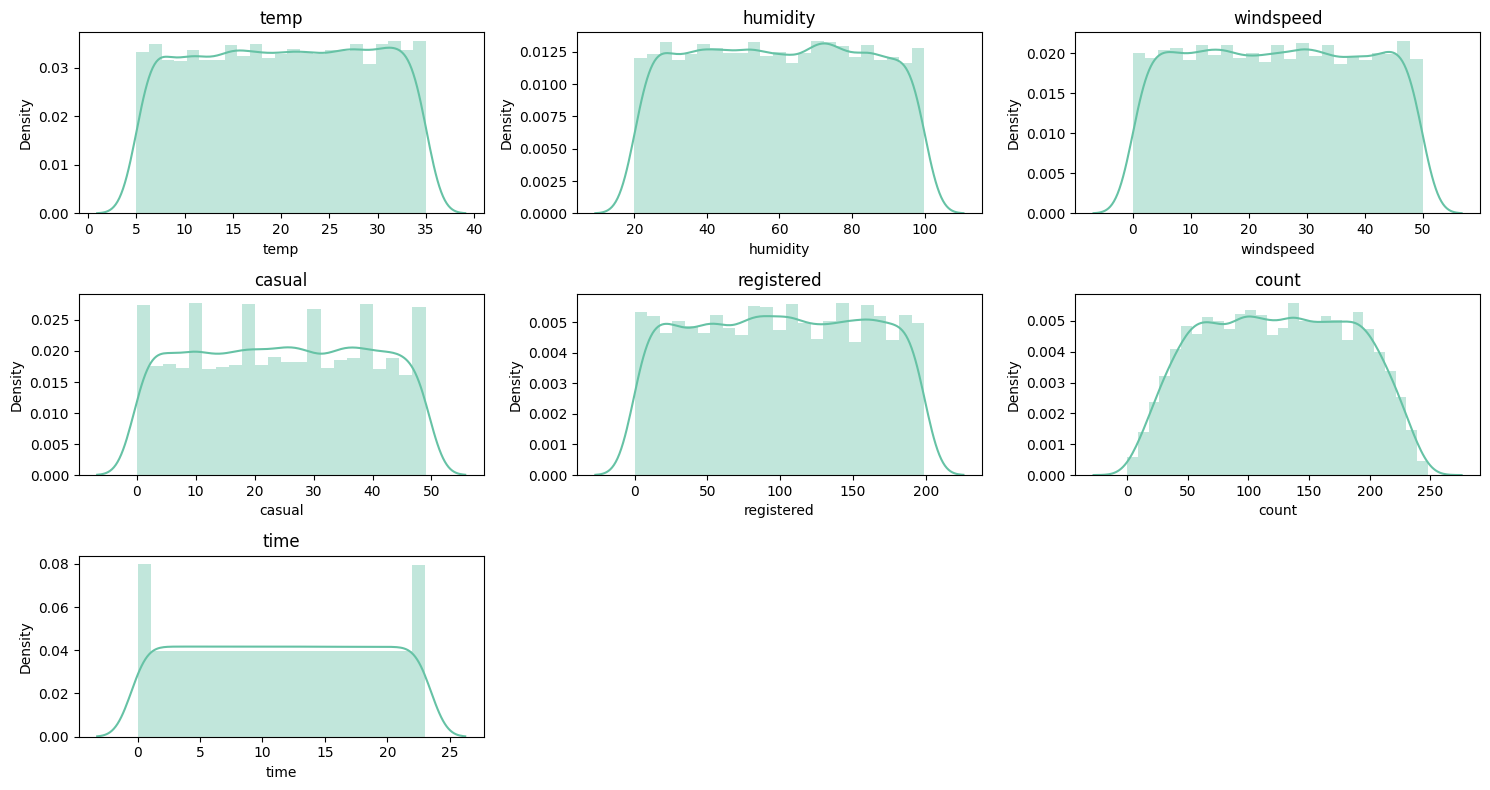

In [ ]:
num_col = df.select_dtypes(include=['number'])
plt.figure(figsize=(15,8))
for i,col in enumerate(num_col):
  plt.subplot(3,3,i+1)
  sns.distplot(df[col])
  plt.title(col)
plt.tight_layout()
plt.show()

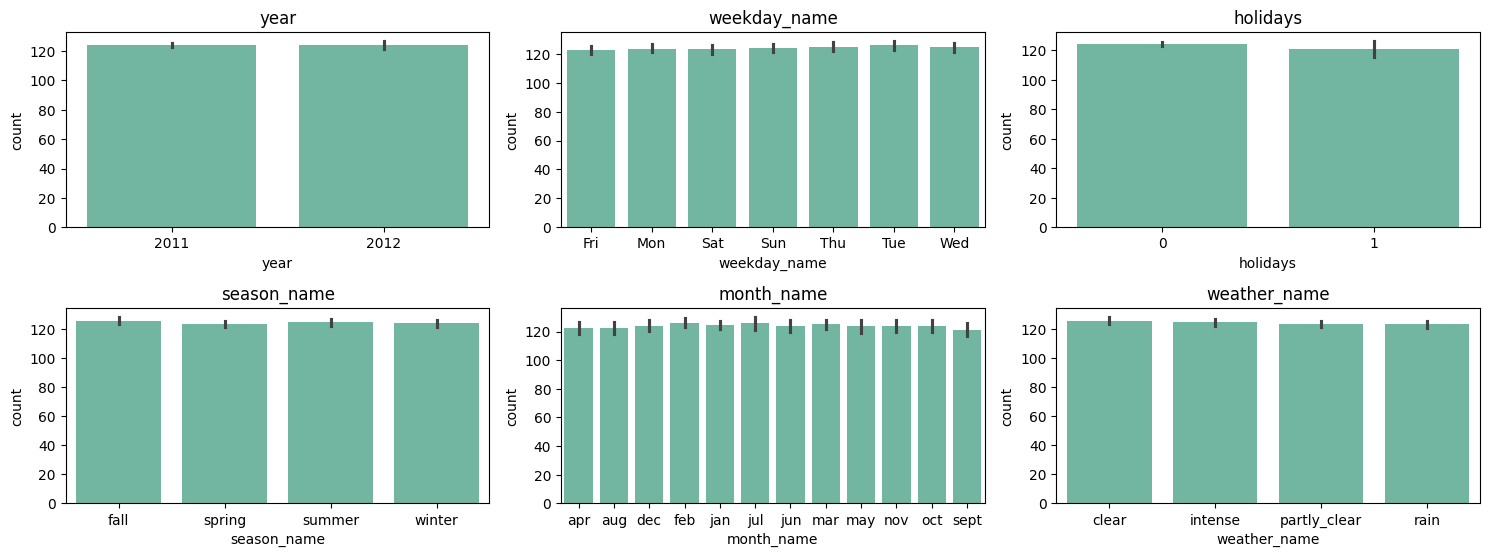

In [ ]:
cat_col = df.select_dtypes(exclude=['number'])
sns.set_palette("Set2")
plt.figure(figsize=(15, 8))

for i, col in enumerate(cat_col):
    plt.subplot(3, 3, i + 1)
    sns.barplot(data=df, x=col, y='count')
    plt.title(col)

plt.tight_layout()
plt.show()

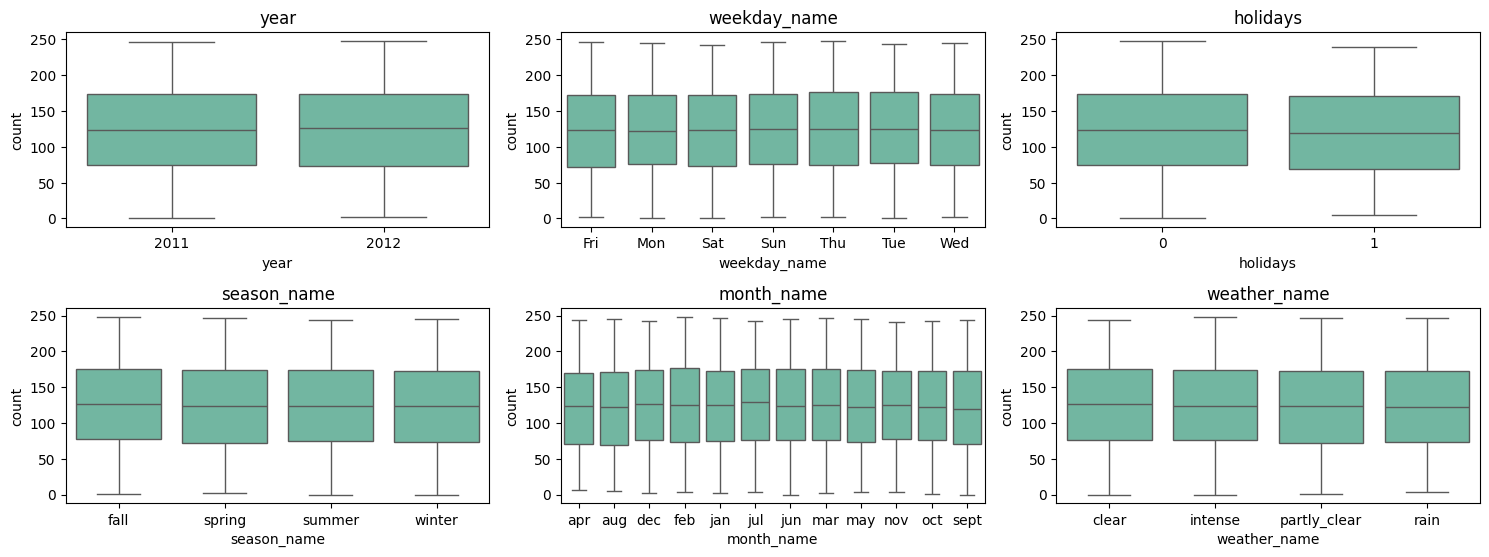

In [ ]:
plt.figure(figsize=(15, 8))

for i, col in enumerate(cat_col):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(data=df, x=col, y='count')
    plt.title(col)

plt.tight_layout()
plt.show()

<Axes: >

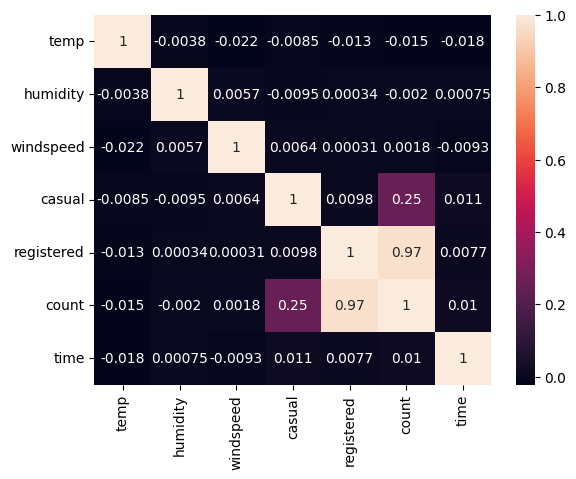

In [ ]:
sns.heatmap(df.select_dtypes(include='number').corr(),annot=True)

Check if there is any significant difference between the no. of rides on working days

H0 : No significant difference between no.of rides on holidays and working days

Ha : There is significant difference between no.of rides on holidays and working days

- *Significance* level : 0.05

In [ ]:
df.groupby('holidays')['count'].mean()

,count
holidays,
0,124.218217
1,120.655702


In [ ]:
#calculate the p-value:

import scipy.stats as stats
tstats,pval = stats.ttest_ind(df[df['holidays']==0]['count'],df[df['holidays']==1]['count'])
print("pvalue: ",pval)

pvalue:  0.21037869054187708


- *pvalue* > *0.05, hence fail to reject null hypothesis.*

- ***No significant difference between rides on holidays and non holidays or there is equal trend of rides in both holidays and Non holidays ***

**- Check if the Weather conditions are significantly different during different Seasons?**

Setting up Null and Alternate Hypothesis:

H0 : The Weather conditions are not significantly different during different Seasons

Ha : The Weather conditions are significantly different during different Seasons

Significance level : 0.05

Applying chi-square test since it is categorical - categorical with the significance level given as 0.05

In [ ]:
#creating contingency table

contingency_table = pd.crosstab(df['weather_name'],df['season_name'])

contingency_table

season_name,fall,spring,summer,winter
weather_name,,,,
clear,664,695,702,711
intense,650,707,689,687
partly_clear,713,673,660,674
rain,663,678,672,648


*pvalue < alpha, hence rejecting null hypothesis*

***The Weather conditions are significantly different during different Seasons***

**Key takeaways from EDA**

- The fall season has the highest ride count, followed by summer and winter.

- Clear weather conditions correlate with a higher count of cycles.

- There is no significant difference between holiday and non-holiday days.

- Similarly, workdays and non-workdays show no significant difference.

- Year, month, and weekday show notable differences in cycle count.

- Both 'temp' and 'humidity' show high correlation with count, and since 'casual' and 'registered' contribute to 'count', they also exhibit a high correlation

- Casual users are fewer on workdays, while there is a higher number of casual user sales during the fall season.

- High humidity correlates with lower sales.

- Higher temperatures tend to result in comparatively higher sales.

**Data Preparation**

In [ ]:
df.columns


Index(['temp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'time', 'year', 'weekday_name', 'holidays', 'season_name', 'month_name',
       'weather_name'],
      dtype='object')

In [ ]:
'''Function to create the dummy variables. It creates the dummy variable, drops the first dummy variable,
concatenates this with the original dataset and removes the original categorical column'''
def create_dummy(dataframe, column_name):
  temp_df = pd.get_dummies(dataframe[column_name], drop_first = True)
  dataframe = pd.concat([dataframe, temp_df], axis = 1)
  dataframe.drop([column_name], axis = 1, inplace = True)
  return dataframe

In [ ]:
# Categorical columns for which we need to create the dummy variables
cat_cols = ['season_name','month_name','weekday_name','weather']

#print("Columns in DataFrame before creating dummies:", df.columns) # Added line to inspect columns

# Creates the dummy variables
for col in cat_cols:
    if col in df.columns: # Check if the column exists
        df = create_dummy(df, col)
    else:
      pass

df.head()

,temp,humidity,windspeed,casual,registered,count,time,year,holidays,weather_name,...,may,nov,oct,sept,Mon,Sat,Sun,Thu,Tue,Wed
0,6.66,76.62,9.57,5,128,133,0,2011,0,partly_clear,...,False,False,False,False,False,True,False,False,False,False
1,13.54,55.91,4.01,36,184,220,1,2011,0,rain,...,False,False,False,False,False,True,False,False,False,False
2,29.58,20.97,33.61,34,97,131,2,2011,0,rain,...,False,False,False,False,False,True,False,False,False,False
3,7.40,61.64,15.85,6,47,53,3,2011,0,clear,...,False,False,False,False,False,True,False,False,False,False
4,30.66,98.71,11.47,14,199,213,4,2011,0,intense,...,False,False,False,False,False,True,False,False,False,False


In [ ]:

bool_col = df.select_dtypes(include=['bool']).columns
for i in bool_col:
  df[i] = df[i].astype(int)

In [ ]:
df.sample(10)

,temp,humidity,windspeed,casual,registered,count,time,year,holidays,weather_name,...,may,nov,oct,sept,Mon,Sat,Sun,Thu,Tue,Wed
230,32.85,58.16,28.68,11,63,74,14,2011,0,clear,...,0,0,0,0,1,0,0,0,0,0
7038,16.03,77.43,7.44,12,154,166,6,2011,0,clear,...,0,0,1,0,0,0,0,0,0,0
1731,9.06,82.09,42.98,5,45,50,3,2011,0,rain,...,0,0,0,0,1,0,0,0,0,0
8364,29.03,92.61,36.14,7,81,88,12,2011,0,rain,...,0,0,0,0,0,0,0,1,0,0
4933,10.77,53.47,32.37,32,97,129,13,2011,0,intense,...,0,0,0,0,1,0,0,0,0,0
6695,16.07,97.75,42.42,48,91,139,23,2011,1,intense,...,0,0,1,0,0,0,0,1,0,0
3191,8.62,90.86,16.12,48,64,112,23,2011,0,rain,...,1,0,0,0,0,0,0,0,0,0
3554,14.68,23.78,8.01,17,49,66,2,2011,0,clear,...,1,0,0,0,0,0,1,0,0,0
8632,11.61,88.64,36.48,22,108,130,16,2011,0,clear,...,0,0,0,0,1,0,0,0,0,0
3836,15.64,82.35,28.02,11,89,100,20,2011,0,clear,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
df_train,df_test = train_test_split(df,train_size=0.70,random_state=100)

In [ ]:
# Scaling the numeric columns
scaler = MinMaxScaler()
# Get numerical columns, excluding 'cnt'
num_cols = df_train.select_dtypes(include=['float64']).columns

df_train[num_cols] = scaler.fit_transform(df_train[num_cols])
df_test[num_cols] = scaler.transform(df_test[num_cols])

# Separately handle 'cnt' int64 scaling
df_test['count'] = scaler.fit_transform(df_test[['count']])
df_train['count'] = scaler.fit_transform(df_train[['count']])

In [ ]:
df_train.head()

,temp,humidity,windspeed,casual,registered,count,time,year,holidays,weather_name,...,may,nov,oct,sept,Mon,Sat,Sun,Thu,Tue,Wed
8414,0.762333,0.059647,0.508902,41,51,0.370968,14,2011,0,rain,...,0,0,0,0,0,1,0,0,0,0
6601,0.526000,0.332500,0.325865,13,40,0.213710,1,2011,0,clear,...,0,0,1,0,1,0,0,0,0,0
530,0.925667,0.488808,0.220844,14,78,0.370968,2,2011,0,rain,...,0,0,0,0,0,0,1,0,0,0
4725,0.735667,0.127673,0.632326,26,99,0.504032,21,2011,0,rain,...,0,0,0,0,0,1,0,0,0,0
6727,0.369000,0.102663,0.485897,8,77,0.342742,7,2011,0,partly_clear,...,0,0,1,0,0,1,0,0,0,0


In [ ]:

df_test.head()

,temp,humidity,windspeed,casual,registered,count,time,year,holidays,weather_name,...,may,nov,oct,sept,Mon,Sat,Sun,Thu,Tue,Wed
7810,0.862000,0.593973,0.689738,35,37,0.288066,10,2011,0,clear,...,0,1,0,0,0,0,0,0,1,0
1366,0.776000,0.395273,0.742549,12,133,0.588477,22,2011,0,intense,...,0,0,0,0,0,1,0,0,0,0
2494,0.083667,0.987995,0.715943,27,198,0.917695,22,2011,0,rain,...,0,0,0,0,0,0,0,1,0,0
3555,0.424333,0.080530,0.860972,8,89,0.390947,3,2011,0,rain,...,1,0,0,0,0,0,1,0,0,0
771,0.998667,0.852570,0.748550,24,171,0.794239,3,2011,0,partly_clear,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
X_train = df_train.drop(['count'],axis=1)
y_train = df_train['count']
X_test = df_test.drop(['count'],axis=1)
y_test = df_test['count']


**Model Building using RFE**

- Building the model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# Convert boolean columns to integers before RFE
bool_cols_train = X_train.select_dtypes(include=['bool']).columns
for col in bool_cols_train:
  X_train[col] = X_train[col].astype(int)

bool_cols_test = X_test.select_dtypes(include=['bool']).columns
for col in bool_cols_test:
  X_test[col] = X_test[col].astype(int)


#Buildinng the RFE and selecting the top-15 variables from the RFE

lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm,n_features_to_select=10)
rfe = rfe.fit(X_train, y_train)

In [ ]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('temp', np.False_, np.int64(3)),
 ('humidity', np.True_, np.int64(1)),
 ('windspeed', np.False_, np.int64(2)),
 ('casual', np.True_, np.int64(1)),
 ('registered', np.True_, np.int64(1)),
 ('time', np.False_, np.int64(10)),
 ('year', np.False_, np.int64(12)),
 ('holidays', np.True_, np.int64(1)),
 ('spring', np.False_, np.int64(17)),
 ('summer', np.False_, np.int64(8)),
 ('winter', np.False_, np.int64(9)),
 ('aug', np.False_, np.int64(16)),
 ('dec', np.False_, np.int64(20)),
 ('feb', np.False_, np.int64(11)),
 ('jan', np.True_, np.int64(1)),
 ('jul', np.False_, np.int64(18)),
 ('jun', np.False_, np.int64(4)),
 ('mar', np.False_, np.int64(21)),
 ('may', np.False_, np.int64(5)),
 ('nov', np.True_, np.int64(1)),
 ('oct', np.True_, np.int64(1)),
 ('sept', np.False_, np.int64(22)),
 ('Mon', np.True_, np.int64(1)),
 ('Sat', np.False_, np.int64(6)),
 ('Sun', np.False_, np.int64(7)),
 ('Thu', np.False_, np.int64(14)),
 ('Tue', np.False_, np.int64(13)),
 ('Wed', np.False_, np.int64(15)),
 ('we

In [ ]:
rfe_col = X_train.columns[rfe.support_]
print(rfe_col)

Index(['humidity', 'casual', 'registered', 'holidays', 'jan', 'nov', 'oct',
       'Mon', 'weather_name_intense', 'weather_name_partly_clear'],
      dtype='object')


In [ ]:
print(X_train.columns[~rfe.support_])

Index(['temp', 'windspeed', 'time', 'year', 'spring', 'summer', 'winter',
       'aug', 'dec', 'feb', 'jul', 'jun', 'mar', 'may', 'sept', 'Sat', 'Sun',
       'Thu', 'Tue', 'Wed', 'weather_name_rain'],
      dtype='object')


In [ ]:
# Taking top 10 independent variables from the RFE
X_train_rfe = X_train[rfe_col]
X_test_rfe = X_test[rfe_col]

# Adding the constant to the dataset
X_train_rfe_sm = sm.add_constant(X_train_rfe)
X_test_rfe_sm = sm.add_constant(X_test_rfe)

#Building the model
lr = sm.OLS(y_train,X_train_rfe_sm)
lr_model = lr.fit()

#Checking the summary of model
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.167e+31
Date:                Wed, 11 Jun 2025   Prob (F-statistic):               0.00
Time:                        18:07:19   Log-Likelihood:             2.5519e+05
No. Observations:                7620   AIC:                        -5.104e+05
Df Residuals:                    7609   BIC:                        -5.103e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

R-squared tells us how well the model explains the variance in the dependent variable, while adjusted R-squared adjusts for the number of predictors. Here, these two values are similar, it indicates that adding more variables hasn’t improved the model significantly, meaning we’ve struck a good balance without overfitting. Essentially, this shows that the chosen predictors are relevant and that the model is well-constructed. let us check vif

In [ ]:
# Calculating the VIF Values
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_sm.values, i) for i in range(X_train_rfe_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
0,const,11.42
10,weather_name_partly_clear,1.13
9,weather_name_intense,1.12
5,jan,1.03
6,nov,1.02
7,oct,1.02
4,holidays,1.01
2,casual,1.00
1,humidity,1.00
3,registered,1.00


In [ ]:
X_train_rfe_sm.columns

Index(['const', 'humidity', 'casual', 'registered', 'holidays', 'jan', 'nov',
       'oct', 'Mon', 'weather_name_intense', 'weather_name_partly_clear'],
      dtype='object')

All the columns has the VIF value less than 5, which is nothing but the independent variables are not heavily correlated with the other independent variables.

Now, we got the model, where all the p-values are less than the 0.05 and the R-squared is very close with the adjusted R-squares. And the VIF will decrease or not change when we drop the variable but it won't increase. So we can freeze the model here.

And proceed with the Residual analysis.

## **Residual Analysis and evaluation**

<Axes: ylabel='Density'>

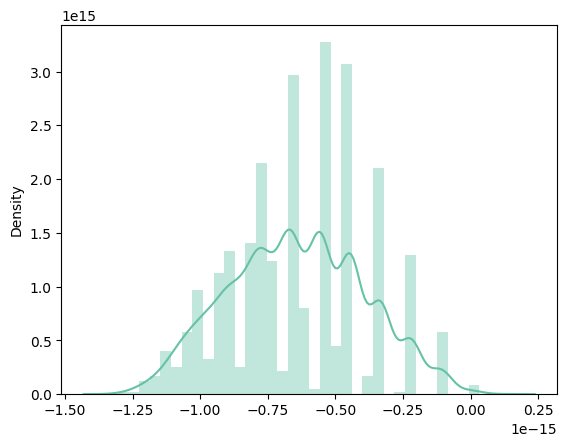

In [ ]:
y_pred_train = lr_model.predict(X_train_rfe_sm)
res1 = (y_train - y_pred_train)
sns.distplot(res1)

<Axes: ylabel='Density'>

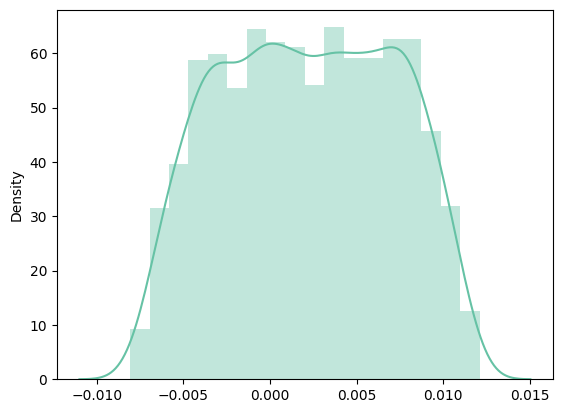

In [ ]:
y_pred_test = lr_model.predict(X_test_rfe_sm)
res2 = (y_test - y_pred_test)
sns.distplot(res2)

In [ ]:
r2_score(y_train,y_pred_train)

1.0

In [ ]:

r2_score(y_test,y_pred_test)

0.9995150814971396

In [ ]:
# Get the coefficients and p-values
coefficients = lr_model.params[1:]  # Exclude constant term
p_values = lr_model.pvalues[1:]  # Exclude constant term

# Create a DataFrame for better visualization
import pandas as pd

features = pd.DataFrame({
    'Feature': X_train_rfe.columns,
    'Coefficient': coefficients,
    'p-value': p_values
})

# Sort by the absolute value of the coefficient
features['Absolute Coeff'] = features['Coefficient'].abs()
features_sorted = features.sort_values(by='Absolute Coeff', ascending=False)

# Display features sorted by importance
print(features_sorted[['Feature', 'Coefficient', 'p-value']])

                                             Feature   Coefficient  \
casual                                        casual  4.032258e-03   
registered                                registered  4.032258e-03   
humidity                                    humidity  4.675080e-16   
weather_name_intense            weather_name_intense -1.023487e-16   
Mon                                              Mon  5.030698e-17   
weather_name_partly_clear  weather_name_partly_clear -4.250073e-17   
jan                                              jan  4.163336e-17   
nov                                              nov  4.163336e-17   
oct                                              oct -1.387779e-17   
holidays                                    holidays -8.673617e-18   

                                p-value  
casual                     0.000000e+00  
registered                 0.000000e+00  
humidity                   1.135462e-63  
weather_name_intense       1.252242e-07  
Mon                

Therefore, the final model includes these 10 variables listed above, which are significant in predicting the demand for rides